In [1]:
import datareader # made by the previous author for reading the collected data
import dataextractor # same as above
import matplotlib.pyplot as plt
import json
from datetime import datetime
import pandas
import numpy as np

In [2]:
def get_busy_vs_relax_timeframes(path, ident, seconds):
    """Returns raw data from either 'on task' or 'relax' time frames and their class (0 or 1).
    TODO: join functions"""

    dataread = datareader.DataReader(path, ident)  # initialize path to data
    data = dataread.read_grc_data()  # read from files
    samp_rate = int(round(len(data[1]) / max(data[0])))
    cog_res = dataread.read_cognitive_load_study(str(ident) + '-primary-extract.txt')

    tasks_data = np.empty((0, seconds*samp_rate))
    tasks_y = np.empty((0, 1))

    busy_n = dataread.get_data_task_timestamps(return_indexes=True)
    relax_n = dataread.get_relax_timestamps(return_indexes=True)

    for i in cog_res['task_number']:
        task_num_table = i - 225  # 0 - 17

        ### task versus relax (1 sample each)
        dataextract = dataextractor.DataExtractor(data[0][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                                  data[1][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                                  samp_rate)

        dataextract_relax = dataextractor.DataExtractor(data[0][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                        data[1][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                        samp_rate)
        try:
            tasks_data = np.vstack((tasks_data, dataextract.y[-samp_rate * seconds:]))
            tasks_y = np.vstack((tasks_y, 1))
            tasks_data = np.vstack((tasks_data, dataextract_relax.y[-samp_rate * seconds:]))
            tasks_y = np.vstack((tasks_y, 0))
        except ValueError:
            print(ident)  # ignore short windows

    return tasks_data, tasks_y

In [3]:
def get_data_from_idents(path, idents, seconds):
    """Go through all user data and take out windows of only <seconds> long time frames,
    along with the given class (from 'divide_each_task' function).
    """
    samp_rate = 43  # hard-coded sample rate
    data, ys = np.empty((0, samp_rate*seconds)), np.empty((0, 1))
    for i in idents:
        x, y = get_busy_vs_relax_timeframes(path, i, seconds) # either 'get_busy_vs_relax_timeframes',
        # get_engagement_increase_vs_decrease_timeframes, get_task_complexities_timeframes or get_TLX_timeframes
        # TODO: ^ modify, so that different functions can be accessible by parameter
        data = np.vstack((data, x))
        ys = np.vstack((ys, y))
    return data, ys

In [4]:
seconds = 30  # time window length
idents = ['2gu87', 'iz2ps', '1mpau', '7dwjy', '7swyk', '94mnx', 'bd47a', 'c24ur', 'ctsax', 'dkhty', 'e4gay',
              'ef5rq', 'f1gjp', 'hpbxa', 'pmyfl', 'r89k1', 'tn4vl', 'td5pr', 'gyqu9', 'fzchw', 'l53hg', '3n2f9']#,
#               '62i9y'] <- this is a problematic person because some tasks are too short and cannot be used
path = '../../../StudyData/'
ident = '1mpau'
#'62i9y' <- this is a problematic person because some tasks are too short and cannot be used

In [5]:
dataread = datareader.DataReader(path, ident)  # initialize path to data
data = dataread.read_grc_data()  # read from files
samp_rate = int(round(len(data[1]) / max(data[0])))
cog_res = dataread.read_cognitive_load_study(str(ident) + '-primary-extract.txt')

(116201,)
(116201,)


<Figure size 432x288 with 0 Axes>

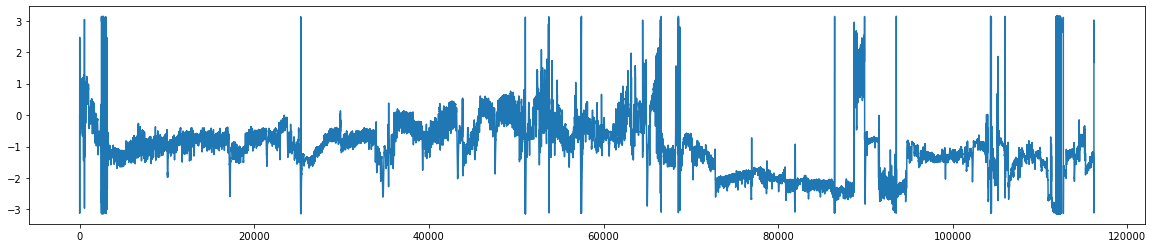

In [6]:
print(data[0].shape) # time
print(data[1].shape) # phase data

#plot phase data
plt.figure()
plt.figure(figsize=(20, 4))
plt.plot(data[1])
# plt.axis('equal')

In [7]:
print(cog_res)

    task_number person_id task_label task_complexity     start_time  \
0           225     1mpau         HP            high  1527700691132   
1           226     1mpau         HP             low  1527700852326   
2           227     1mpau         HP          medium  1527700966614   
3           228     1mpau         FA            high  1527701112371   
4           229     1mpau         FA          medium  1527701346679   
5           230     1mpau         FA             low  1527701575504   
6           231     1mpau         GC          medium  1527701745738   
7           232     1mpau         GC            high  1527701839638   
8           233     1mpau         GC             low  1527701945398   
9           234     1mpau         NC             low  1527702044907   
10          235     1mpau         NC            high  1527702154446   
11          236     1mpau         NC          medium  1527702401928   
12          237     1mpau         SX             low  1527702584385   
13    

In [8]:
busy_n = dataread.get_data_task_timestamps(return_indexes=True)
relax_n = dataread.get_relax_timestamps(return_indexes=True)

In [9]:
print(busy_n) # Array of tuples, where each tuple presents beginning and end of a task time frame
print("\n")
print(relax_n) # Array of tuples, where each tuple presents beginning and end of a relax time frame

[(7109, 11657), (14052, 17085), (18974, 22521), (25253, 33077), (35348, 43180), (45207, 49655), (52543, 54701), (56588, 59261), (61145, 62707), (65432, 68219), (70151, 77981), (80817, 86069), (88680, 89853), (91519, 94281), (96022, 101316), (104020, 106043), (107708, 109095), (110798, 115667)]


[(1232, 5115), (12627, 13920), (17542, 18835), (22794, 24088), (33866, 35160), (43753, 45046), (50216, 51510), (55178, 56471), (59738, 61033), (63097, 64390), (68759, 70053), (78603, 79896), (86350, 87643), (90107, 91400), (94620, 95914), (101609, 102902), (106287, 107581), (109376, 110669)]


In [10]:
tasks_data = np.empty((0, seconds*samp_rate))
tasks_y = np.empty((0, 1))
phase_data = np.empty((0, seconds*samp_rate))
for i in cog_res['task_number']:
    task_num_table = i - 225  # 0 - 17

    ### task versus relax (1 sample each)
    dataextract = dataextractor.DataExtractor(data[0][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                              data[1][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                              samp_rate)

    dataextract_relax = dataextractor.DataExtractor(data[0][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                    data[1][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                    samp_rate)
    
    phase_tmp1 = data[1][busy_n[task_num_table][0]:busy_n[task_num_table][1]]
    phase_tmp2 = data[1][relax_n[task_num_table][0]:relax_n[task_num_table][1]]
    
    try:
        tasks_data = np.vstack((tasks_data, dataextract.y[-samp_rate * seconds:]))
        tasks_y = np.vstack((tasks_y, 1))
        tasks_data = np.vstack((tasks_data, dataextract_relax.y[-samp_rate * seconds:]))
        tasks_y = np.vstack((tasks_y, 0))
        phase_data = np.vstack((phase_data, phase_tmp1[-samp_rate * seconds:]))
        phase_data = np.vstack((phase_data, phase_tmp2[-samp_rate * seconds:]))
    except ValueError:
        print(task_num_table, ident)  # ignore short windows

12 1mpau


In [11]:
print(tasks_data.shape)
print(tasks_y.shape)
print(phase_data.shape)

(34, 1290)
(34, 1)
(34, 1290)


<Figure size 432x288 with 0 Axes>

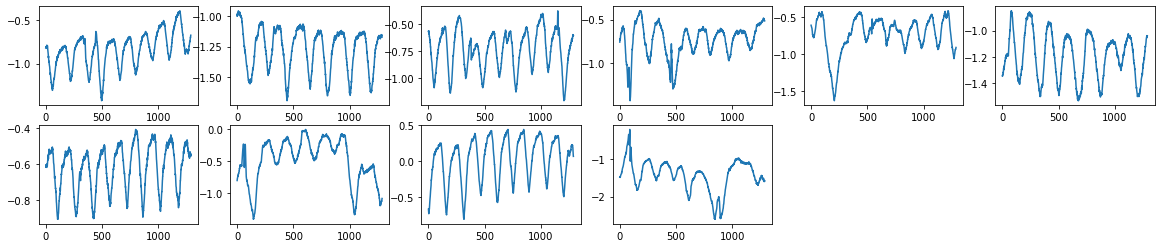

<Figure size 432x288 with 0 Axes>

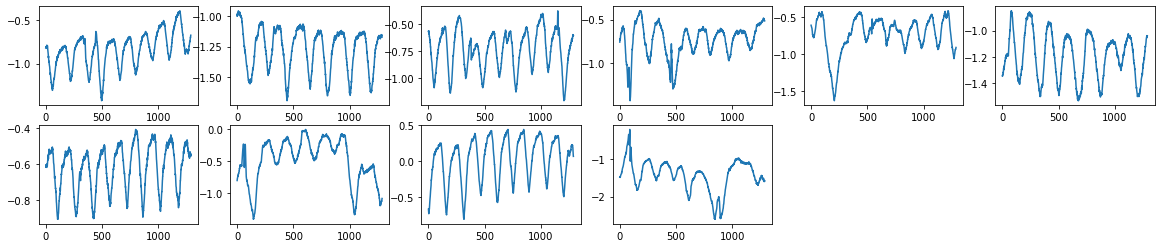

In [12]:
#plot n samples
n = 10

#plot some normalized data values
plt.figure()
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(n/5, 6, i+1)
    plt.plot(tasks_data[i])

#plot some shortened data values
plt.figure()
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(n/5, 6, i+1)
    plt.plot(phase_data[i])

In [13]:
# leave out person out validation
for ident in range(1):

#     print("iteration:", ident+1, "of", n, "; time elapsed:", datetime.now()-start_time)

    train_idents = [x for i, x in enumerate(idents) if (i != ident and i != (n-1+ident)%n)]
    validation_idents = [idents[ident]]
    test_idents = [idents[ident-1]]
    print(test_idents)

['3n2f9']


In [14]:
phase_data.dtype

dtype('float64')

In [15]:
tempDE = dataextractor.DataExtractor(data[0][relax_n[1][0]:relax_n[1][1]],
                                                    data[1][relax_n[1][0]:relax_n[1][1]],
                                                    samp_rate)

In [16]:
tempDE.y.shape

(1293,)

In [17]:
BR = tempDE.extract_from_breathing_time(tempDE.t[-tempDE.samp_rate*seconds:], tempDE.y[-tempDE.samp_rate*seconds:])
BR

,br_rate,br_change_in_rate_start_end,br_freq_6_12,br_freq_12_18,br_freq_18_24,br_freq_24_30,br_IBI_mean,br_IBI_std,br_raw_mean,br_raw_median,br_raw_std,br_raw_rms,br_ok
0,13.864191,2.521994,1.190697,2.61062,0.793212,0.587313,4.093597,0.714378,0.000336,0.039042,0.160568,0.160568,True


In [18]:
if BR['br_ok'][0]:
    print('yes')
BR['br_ok'][0]

yes


True

In [19]:
bar = BR.to_numpy(dtype='float64')[0][:-1]
bar

array([1.38641915e+01, 2.52199413e+00, 1.19069731e+00, 2.61061977e+00,
       7.93212320e-01, 5.87313413e-01, 4.09359741e+00, 7.14377999e-01,
       3.35986631e-04, 3.90422240e-02, 1.60567546e-01, 1.60567897e-01])

In [20]:
HR = tempDE.extract_from_heartbeat_time(tempDE.t[-tempDE.samp_rate*seconds:], tempDE.y[-tempDE.samp_rate*seconds:])
HR

,hr_rate,hr_change_in_rate_start_end,hr_RR_mean,hr_SDNN,hr_RMSSD,hr_pNN50,hr_pNN70,hr_HRV_lf,hr_HRV_hf,hr_HRV_lf_hf,hr_ok
0,74.362482,-2.521994,0.770721,0.147424,0.784694,1.0,0.666667,0.333744,3.967773,0.084114,False


In [21]:
if HR['hr_ok'][0]:
    print('yes')
HR['hr_ok'][0]

False

In [22]:
tmp = HR.to_numpy(dtype='float64')[0][:-1]
tmp

array([74.36248168, -2.52199413,  0.77072144,  0.14742367,  0.78469437,
        1.        ,  0.66666667,  0.33374407,  3.96777306,  0.0841137 ])

In [23]:
ident = '1mpau'
dataread = datareader.DataReader(path, ident)  # initialize path to data
data = dataread.read_grc_data()  # read from files
samp_rate = int(round(len(data[1]) / max(data[0])))
cog_res = dataread.read_cognitive_load_study(str(ident) + '-primary-extract.txt')

tasks_data = np.empty((0, seconds*samp_rate))
tasks_y = np.empty((0, 1))
breathing = np.empty((0,12))
heartbeat = np.empty((0,10))

busy_n = dataread.get_data_task_timestamps(return_indexes=True)
relax_n = dataread.get_relax_timestamps(return_indexes=True)

In [27]:
for i in cog_res['task_number']:
        task_num_table = i - 225  # 0 - 17
        tmp_tasks_data = np.empty((0, seconds*samp_rate))
        tmp_tasks_y = np.empty((0, 1))
        tmp_breathing = np.empty((0,12))
        tmp_heartbeat = np.empty((0,10))

        ### task versus relax (1 sample each)
        dataextract = dataextractor.DataExtractor(data[0][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                                  data[1][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                                  samp_rate)

        dataextract_relax = dataextractor.DataExtractor(data[0][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                        data[1][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                        samp_rate)
        
        try:
            
            # get extracted features for breathing
            tmpBR_busy = dataextract.extract_from_breathing_time(dataextract.t[-samp_rate*seconds:],
                                                                 dataextract.y[-samp_rate*seconds:])
            tmpBR_relax = dataextract_relax.extract_from_breathing_time(dataextract_relax.t[-samp_rate*seconds:],
                                                                 dataextract_relax.y[-samp_rate*seconds:])
            #get extracted features for heartbeat
            tmpHR_busy = dataextract.extract_from_heartbeat_time(dataextract.t[-samp_rate*seconds:],
                                                                 dataextract.y[-samp_rate*seconds:])
            tmpHR_relax = dataextract.extract_from_heartbeat_time(dataextract_relax.t[-samp_rate*seconds:],
                                                                 dataextract_relax.y[-samp_rate*seconds:])

            should_pass = False
                                                                  
            if not (tmpBR_busy['br_ok'][0]):
#                 print('tmpBR_busy not ok:', ident, task_num_table)
                should_pass = True
            if not (tmpBR_relax['br_ok'][0]):
#                 print('tmpBR_relax not ok:', ident, task_num_table)
                should_pass = True
            if not (tmpHR_busy['hr_ok'][0]):
#                 print('tmpHR_busy not ok:', ident, task_num_table)
                should_pass = True
            if not (tmpHR_busy['hr_ok'][0]):
#                 print('tmpHR_relax not ok:', ident, task_num_table)
                should_pass = True
            if should_pass:
                
                pass

            tmp_tasks_data = np.vstack((tmp_tasks_data, dataextract.y[-samp_rate * seconds:]))
            tmp_tasks_y = np.vstack((tasks_y, 1))
            tmp_tasks_data = np.vstack((tmp_tasks_data, dataextract_relax.y[-samp_rate * seconds:]))
            tmp_tasks_y = np.vstack((tmp_tasks_y, 0))
            
            # put busy frames then relaxed frames under the previous frames
            tmp_breathing = np.vstack((tmp_breathing, tmpBR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            tmp_breathing = np.vstack((tmp_breathing, tmpBR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            
            tmp_heartbeat = np.vstack((tmp_heartbeat, tmpHR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            tmp_heartbeat = np.vstack((tmp_heartbeat, tmpHR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            
        except ValueError:
#             print(ident)  # ignore short windows
            continue
        
        # put busy frames then relaxed frames under the previous frames
        tasks_data = np.vstack((tasks_data, dataextract.y[-samp_rate * seconds:]))
        tasks_y = np.vstack((tasks_y, 1))
        tasks_data = np.vstack((tasks_data, dataextract_relax.y[-samp_rate * seconds:]))
        tasks_y = np.vstack((tasks_y, 0))

In [28]:
def get_busy_vs_relax_timeframes_br_hr(path, ident, seconds):
    """Returns raw data from either 'on task' or 'relax' time frames and their class (0 or 1).
    TODO: join functions"""

    dataread = datareader.DataReader(path, ident)  # initialize path to data
    data = dataread.read_grc_data()  # read from files
    samp_rate = int(round(len(data[1]) / max(data[0])))
    cog_res = dataread.read_cognitive_load_study(str(ident) + '-primary-extract.txt')

    tasks_data = np.empty((0, seconds*samp_rate))
    tasks_y = np.empty((0, 1))
    breathing = np.empty((0,12))
    heartbeat = np.empty((0,10))

    busy_n = dataread.get_data_task_timestamps(return_indexes=True)
    relax_n = dataread.get_relax_timestamps(return_indexes=True)

    for i in cog_res['task_number']:
        task_num_table = i - 225  # 0 - 17
        tmp_tasks_data = np.empty((0, seconds*samp_rate))
        tmp_tasks_y = np.empty((0, 1))
        tmp_breathing = np.empty((0,12))
        tmp_heartbeat = np.empty((0,10))

        ### task versus relax (1 sample each)
        dataextract = dataextractor.DataExtractor(data[0][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                                  data[1][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                                  samp_rate)

        dataextract_relax = dataextractor.DataExtractor(data[0][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                        data[1][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                        samp_rate)
        
        try:
            
            # get extracted features for breathing
            tmpBR_busy = dataextract.extract_from_breathing_time(dataextract.t[-samp_rate*seconds:],
                                                                 dataextract.y[-samp_rate*seconds:])
            tmpBR_relax = dataextract_relax.extract_from_breathing_time(dataextract_relax.t[-samp_rate*seconds:],
                                                                 dataextract_relax.y[-samp_rate*seconds:])
            #get extracted features for heartbeat
            tmpHR_busy = dataextract.extract_from_heartbeat_time(dataextract.t[-samp_rate*seconds:],
                                                                 dataextract.y[-samp_rate*seconds:])
            tmpHR_relax = dataextract.extract_from_heartbeat_time(dataextract_relax.t[-samp_rate*seconds:],
                                                                 dataextract_relax.y[-samp_rate*seconds:])

            should_pass = False
                                                                  
#             if not (tmpBR_busy['br_ok'][0]):
# #                 print('tmpBR_busy not ok:', ident, task_num_table)
#                 should_pass = True
#             if not (tmpBR_relax['br_ok'][0]):
# #                 print('tmpBR_relax not ok:', ident, task_num_table)
#                 should_pass = True
#             if not (tmpHR_busy['hr_ok'][0]):
# #                 print('tmpHR_busy not ok:', ident, task_num_table)
#                 should_pass = True
#             if not (tmpHR_busy['hr_ok'][0]):
# #                 print('tmpHR_relax not ok:', ident, task_num_table)
#                 should_pass = True
#             if should_pass:
                
#                 pass

            tmp_tasks_data = np.vstack((tmp_tasks_data, dataextract.y[-samp_rate * seconds:]))
            tmp_tasks_y = np.vstack((tasks_y, 1))
            tmp_tasks_data = np.vstack((tmp_tasks_data, dataextract_relax.y[-samp_rate * seconds:]))
            tmp_tasks_y = np.vstack((tmp_tasks_y, 0))
            
            # put busy frames then relaxed frames under the previous frames
            tmp_breathing = np.vstack((tmp_breathing, tmpBR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            tmp_breathing = np.vstack((tmp_breathing, tmpBR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            
            tmp_heartbeat = np.vstack((tmp_heartbeat, tmpHR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            tmp_heartbeat = np.vstack((tmp_heartbeat, tmpHR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            
        except ValueError:
#             print(ident)  # ignore short windows
            continue
        
        # put busy frames then relaxed frames under the previous frames
        tasks_data = np.vstack((tasks_data, dataextract.y[-samp_rate * seconds:]))
        tasks_y = np.vstack((tasks_y, 1))
        tasks_data = np.vstack((tasks_data, dataextract_relax.y[-samp_rate * seconds:]))
        tasks_y = np.vstack((tasks_y, 0))
        
        breathing = np.vstack((breathing, tmpBR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
        breathing = np.vstack((breathing, tmpBR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))

        heartbeat = np.vstack((heartbeat, tmpHR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
        heartbeat = np.vstack((heartbeat, tmpHR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))

    return tasks_data, tasks_y, breathing, heartbeat

In [29]:
ident = idents[21]
tasks_data, tasks_y, breathing, heartbeat = get_busy_vs_relax_timeframes_br_hr(path, ident, seconds)

In [30]:
breathing.shape #, heartbeat

(32, 12)

In [31]:
def get_data_from_idents_br_hr(path, idents, seconds):
    """Go through all user data and take out windows of only <seconds> long time frames,
    along with the given class (from 'divide_each_task' function).
    """
    samp_rate = 43  # hard-coded sample rate
    data, ys = np.empty((0, samp_rate*seconds)), np.empty((0, 1))
    brs = np.empty((0,12))
    hrs = np.empty((0,10))
    combined = np.empty((0,22))
    for i in idents:
        x, y, br, hr = get_busy_vs_relax_timeframes_br_hr(path, i, seconds) # either 'get_busy_vs_relax_timeframes',
        # get_engagement_increase_vs_decrease_timeframes, get_task_complexities_timeframes or get_TLX_timeframes
        # TODO: ^ modify, so that different functions can be accessible by parameter
        data = np.vstack((data, x))
        ys = np.vstack((ys, y))
        brs = np.vstack((brs, br))
        hrs = np.vstack((hrs, hr))
    combined = np.hstack((brs,hrs))
    return data, ys, brs, hrs, combined

In [32]:
ident = [idents[0]]
tasks_data, tasks_y, breathing, heartbeat, combined = get_data_from_idents_br_hr(path, ident, seconds)

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV


In [34]:
train_idents = idents[:-5]
validation_idents = [idents[-1]]
test_idents = idents[-5:-2]

x_train, y_train, breathing_train, heartbeat_train, combined_train = get_data_from_idents_br_hr(path, train_idents, seconds)
x_valid, y_valid, breathing_valid, heartbeat_valid, combined_valid = get_data_from_idents_br_hr(path, validation_idents, seconds)
x_test, y_test, breathing_test, heartbeat_test, combined_test = get_data_from_idents_br_hr(path, test_idents, seconds)

D:\Miscellanious\Anaconda\envs\py37talos\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Miscellanious\Anaconda\envs\py37talos\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
D:\Miscellanious\Anaconda\envs\py37talos\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Miscellanious\Anaconda\envs\py37talos\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Miscellanious\Anaconda\envs\py37talos\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [35]:
sscaler = StandardScaler()
sscaler.fit(np.vstack((x_train, x_test, x_valid)))
xt_train = sscaler.transform(x_train)
xt_valid = sscaler.transform(x_valid)
xt_test = sscaler.transform(x_test)

sscaler = StandardScaler()
sscaler.fit(np.vstack((breathing_train, breathing_test, breathing_valid)))
brt_train = sscaler.transform(breathing_train)
brt_valid = sscaler.transform(breathing_valid)
brt_test = sscaler.transform(breathing_test)

sscaler = StandardScaler()
sscaler.fit(np.vstack((heartbeat_train, heartbeat_test, heartbeat_valid)))
hrt_train = sscaler.transform(heartbeat_train)
hrt_valid = sscaler.transform(heartbeat_valid)
hrt_test = sscaler.transform(heartbeat_test)

sscaler = StandardScaler()
sscaler.fit(np.vstack((combined_train, combined_test, combined_valid)))
cmt_train = sscaler.transform(combined_train)
cmt_valid = sscaler.transform(combined_valid)
cmt_test = sscaler.transform(combined_test)


# Scale with MinMax to range [0,1]
mmscaler = MinMaxScaler()
mmscaler.fit(np.vstack((xt_train, xt_test, xt_valid)))
xt_train = mmscaler.transform(xt_train)
xt_valid = mmscaler.transform(xt_valid)
xt_test = mmscaler.transform(xt_test)

mmscaler = MinMaxScaler()
mmscaler.fit(np.vstack((breathing_train, breathing_test, breathing_valid)))
brt_train = mmscaler.transform(breathing_train)
brt_valid = mmscaler.transform(breathing_valid)
brt_test = mmscaler.transform(breathing_test)

mmscaler = MinMaxScaler()
mmscaler.fit(np.vstack((heartbeat_train, heartbeat_test, heartbeat_valid)))
hrt_train = mmscaler.transform(heartbeat_train)
hrt_valid = mmscaler.transform(heartbeat_valid)
hrt_test = mmscaler.transform(heartbeat_test)

mmscaler = MinMaxScaler()
mmscaler.fit(np.vstack((combined_train, combined_test, combined_valid)))
cmt_train = mmscaler.transform(combined_train)
cmt_valid = mmscaler.transform(combined_valid)
cmt_test = mmscaler.transform(combined_test)

In [36]:
print(breathing_train.shape, y_train.shape)

(552, 12) (552, 1)


In [37]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_classifier():
    model = KNeighborsClassifier(p=3, n_neighbors=7, metric='cosine')
    return model

In [38]:
# train and test on breathing
base_model = KNN_classifier()
base_model.fit(breathing_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(breathing_test) == y_test.T) / y_test.shape[0]
print('Unscaled Accuracy = {:0.2f}.'.format(base_accuracy))

base_model = KNN_classifier()
base_model.fit(brt_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(brt_test) == y_test.T) / y_test.shape[0]
print('Scaled Accuracy = {:0.2f}.'.format(base_accuracy))

Unscaled Accuracy = 0.64.
Scaled Accuracy = 0.75.


In [39]:
# train and test on heartbeat
base_model = KNN_classifier()
base_model.fit(heartbeat_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(heartbeat_test) == y_test.T) / y_test.shape[0]
print('Unscaled Accuracy = {:0.2f}.'.format(base_accuracy))

base_model = KNN_classifier()
base_model.fit(hrt_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(hrt_test) == y_test.T) / y_test.shape[0]
print('Scaled Accuracy = {:0.2f}.'.format(base_accuracy))

Unscaled Accuracy = 0.52.
Scaled Accuracy = 0.43.


In [40]:
# train and test on combined
base_model = KNN_classifier()
base_model.fit(combined_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(combined_test) == y_test.T) / y_test.shape[0]
print('Unscaled Accuracy = {:0.2f}.'.format(base_accuracy))

base_model = KNN_classifier()
base_model.fit(cmt_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(cmt_test) == y_test.T) / y_test.shape[0]
print('Scaled Accuracy = {:0.2f}.'.format(base_accuracy))

Unscaled Accuracy = 0.60.
Scaled Accuracy = 0.65.


In [41]:
from sklearn.ensemble import RandomForestClassifier
def random_forest_classifier():
    model = RandomForestClassifier(n_estimators = 250,
                                     min_samples_split = 10,
                                     min_samples_leaf = 4,
                                     max_features = 'auto',
                                     max_depth = 90,
                                     bootstrap = True)
    return model

In [42]:
# train and test on breathing
base_model = random_forest_classifier()
base_model.fit(breathing_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(breathing_test) == y_test.T) / y_test.shape[0]
print('Unscaled Accuracy = {:0.2f}.'.format(base_accuracy))

base_model = random_forest_classifier()
base_model.fit(brt_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(brt_test) == y_test.T) / y_test.shape[0]
print('Scaled Accuracy = {:0.2f}.'.format(base_accuracy))

Unscaled Accuracy = 0.72.
Scaled Accuracy = 0.72.


In [43]:
# train and test on heartbeat
base_model = random_forest_classifier()
base_model.fit(heartbeat_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(heartbeat_test) == y_test.T) / y_test.shape[0]
print('Unscaled Accuracy = {:0.2f}.'.format(base_accuracy))

base_model = random_forest_classifier()
base_model.fit(hrt_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(hrt_test) == y_test.T) / y_test.shape[0]
print('Scaled Accuracy = {:0.2f}.'.format(base_accuracy))

Unscaled Accuracy = 0.40.
Scaled Accuracy = 0.37.


In [44]:
# train and test on combined
base_model = random_forest_classifier()
base_model.fit(combined_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(combined_test) == y_test.T) / y_test.shape[0]
print('Unscaled Accuracy = {:0.2f}.'.format(base_accuracy))

base_model = random_forest_classifier()
base_model.fit(cmt_train, y_train.ravel())
base_accuracy = np.sum(base_model.predict(cmt_test) == y_test.T) / y_test.shape[0]
print('Scaled Accuracy = {:0.2f}.'.format(base_accuracy))

Unscaled Accuracy = 0.71.
Scaled Accuracy = 0.70.


In [76]:
print(combined_train.shape, y_train.ravel().shape, y_test.T.shape)

(652, 22) (652,) (1, 34)


In [84]:
aaa = base_model.predict(cmt_test)
print(aaa)
print(y_test.T)

[1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
[[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
  1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]]


In [85]:
print(aaa == y_test.T)
print(aaa == y_test.ravel())
print((aaa == y_test.T)==(aaa == y_test.ravel()))

[[ True False  True  True  True  True  True  True  True  True  True  True
  False  True False  True False  True  True False False False  True  True
   True  True False False  True False  True  True  True False]]
[ True False  True  True  True  True  True  True  True  True  True  True
 False  True False  True False  True  True False False False  True  True
  True  True False False  True False  True  True  True False]
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True]]


In [26]:
seconds = 30  # time window length
idents = ['2gu87', 'iz2ps', '1mpau', '7dwjy', '7swyk', '94mnx', 'bd47a', 'c24ur', 'ctsax', 'dkhty', 'e4gay',
              'ef5rq', 'f1gjp', 'hpbxa', 'pmyfl', 'r89k1', 'tn4vl', 'td5pr', 'gyqu9', 'fzchw', 'l53hg', '3n2f9']#,
#               '62i9y'] <- this is a problematic person because some tasks are too short and cannot be used
path = '../../../StudyData/'

In [46]:
accs = {}
accs['phase'] = []
accs['breathing'] = []
accs['heartbeat'] = []
accs['combined br hb'] = []
accs['valid id'] = []

start_time = datetime.now()
n = len(idents)
import warnings
# leave out person out validation
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for ident in range(n):

        print("iteration:", ident+1, "of", n, "; time elapsed:", datetime.now()-start_time)

        train_idents = [x for i, x in enumerate(idents) if (i != ident and i != (n-1+ident)%n)]
        validation_idents = [idents[ident]]
        test_idents = [idents[ident-1]]
        
        accs['valid id'].append(validation_idents[0])
        
        # Load data
        xt_train, y_train, breathing_train, heartbeat_train, combined_train = get_data_from_idents_br_hr(path, train_idents, seconds)
        xt_valid, y_valid, breathing_valid, heartbeat_valid, combined_valid = get_data_from_idents_br_hr(path, validation_idents, seconds)
        xt_test, y_test, breathing_test, heartbeat_test, combined_test = get_data_from_idents_br_hr(path, test_idents, seconds)

        # Scale with standard scaler
        sscaler = StandardScaler()
        sscaler.fit(np.vstack((xt_train, xt_test, xt_valid)))
        xt_train = sscaler.transform(xt_train)
        xt_valid = sscaler.transform(xt_valid)
        xt_test = sscaler.transform(xt_test)

        sscaler = StandardScaler()
        sscaler.fit(np.vstack((breathing_train, breathing_test, breathing_valid)))
        brt_train = sscaler.transform(breathing_train)
        brt_valid = sscaler.transform(breathing_valid)
        brt_test = sscaler.transform(breathing_test)

        sscaler = StandardScaler()
        sscaler.fit(np.vstack((heartbeat_train, heartbeat_test, heartbeat_valid)))
        hrt_train = sscaler.transform(heartbeat_train)
        hrt_valid = sscaler.transform(heartbeat_valid)
        hrt_test = sscaler.transform(heartbeat_test)

        sscaler = StandardScaler()
        sscaler.fit(np.vstack((combined_train, combined_test, combined_valid)))
        cmt_train = sscaler.transform(combined_train)
        cmt_valid = sscaler.transform(combined_valid)
        cmt_test = sscaler.transform(combined_test)


        # Scale with MinMax to range [0,1]
        mmscaler = MinMaxScaler()
        mmscaler.fit(np.vstack((xt_train, xt_test, xt_valid)))
        xt_train = mmscaler.transform(xt_train)
        xt_valid = mmscaler.transform(xt_valid)
        xt_test = mmscaler.transform(xt_test)

        mmscaler = MinMaxScaler()
        mmscaler.fit(np.vstack((breathing_train, breathing_test, breathing_valid)))
        brt_train = mmscaler.transform(breathing_train)
        brt_valid = mmscaler.transform(breathing_valid)
        brt_test = mmscaler.transform(breathing_test)

        mmscaler = MinMaxScaler()
        mmscaler.fit(np.vstack((heartbeat_train, heartbeat_test, heartbeat_valid)))
        hrt_train = mmscaler.transform(heartbeat_train)
        hrt_valid = mmscaler.transform(heartbeat_valid)
        hrt_test = mmscaler.transform(heartbeat_test)

        mmscaler = MinMaxScaler()
        mmscaler.fit(np.vstack((combined_train, combined_test, combined_valid)))
        cmt_train = mmscaler.transform(combined_train)
        cmt_valid = mmscaler.transform(combined_valid)
        cmt_test = mmscaler.transform(combined_test)


        # Phase classifier
        model = random_forest_classifier()
        model.fit(xt_train, y_train.ravel())
        curr_acc = np.sum(model.predict(xt_valid) == y_valid.T) / y_test.shape[0]
        accs['phase'].append(curr_acc)

        base_model = random_forest_classifier()
        base_model.fit(brt_train, y_train.ravel())
        curr_acc = np.sum(base_model.predict(brt_valid) == y_valid.T) / y_test.shape[0]
        accs['breathing'].append(curr_acc)

        base_model = random_forest_classifier()
        base_model.fit(hrt_train, y_train.ravel())
        curr_acc = np.sum(base_model.predict(hrt_valid) == y_valid.T) / y_test.shape[0]
        accs['heartbeat'].append(curr_acc)

        base_model = random_forest_classifier()
        base_model.fit(cmt_train, y_train.ravel())
        curr_acc = np.sum(base_model.predict(cmt_valid) == y_valid.T) / y_test.shape[0]
        accs['combined br hb'].append(curr_acc)

iteration: 1 of 22 ; time elapsed: 0:00:00.000997
iteration: 2 of 22 ; time elapsed: 0:00:08.952619
iteration: 3 of 22 ; time elapsed: 0:00:17.883225
iteration: 4 of 22 ; time elapsed: 0:00:26.545979
iteration: 5 of 22 ; time elapsed: 0:00:35.139980
iteration: 6 of 22 ; time elapsed: 0:00:44.183805
iteration: 7 of 22 ; time elapsed: 0:00:52.818994
iteration: 8 of 22 ; time elapsed: 0:01:02.136174
iteration: 9 of 22 ; time elapsed: 0:01:11.700396
iteration: 10 of 22 ; time elapsed: 0:01:20.943999
iteration: 11 of 22 ; time elapsed: 0:01:30.681719
iteration: 12 of 22 ; time elapsed: 0:01:39.667539
iteration: 13 of 22 ; time elapsed: 0:01:48.722517
iteration: 14 of 22 ; time elapsed: 0:01:57.557626
iteration: 15 of 22 ; time elapsed: 0:02:06.670675
iteration: 16 of 22 ; time elapsed: 0:02:16.339822
iteration: 17 of 22 ; time elapsed: 0:02:25.608325
iteration: 18 of 22 ; time elapsed: 0:02:34.790593
iteration: 19 of 22 ; time elapsed: 0:02:43.861707
iteration: 20 of 22 ; time elapsed: 0:02

In [47]:
for key in accs:
    if key == "valid id":
        continue
    print(key, "accuracies:")
    print("- min:", np.min(accs[key]))
    print("- max:", np.max(accs[key]))
    print("- mean:", np.mean(accs[key]))
    print("- median:", np.median(accs[key]))
    print("")

phase accuracies:
- min: 0.46875
- max: 0.90625
- mean: 0.652541963755199
- median: 0.6614583333333333

breathing accuracies:
- min: 0.34375
- max: 0.9411764705882353
- mean: 0.7040589720736778
- median: 0.71875

heartbeat accuracies:
- min: 0.4117647058823529
- max: 0.6111111111111112
- mean: 0.49118761140819966
- median: 0.47058823529411764

combined br hb accuracies:
- min: 0.375
- max: 0.9411764705882353
- mean: 0.6954508318478907
- median: 0.6810661764705883



In [48]:
pandas.DataFrame.from_dict(accs)

,phase,breathing,heartbeat,combined br hb,valid id
0,0.687500,0.781250,0.468750,0.812500,2gu87
1,0.764706,0.941176,0.529412,0.941176,iz2ps
2,0.666667,0.638889,0.611111,0.638889,1mpau
3,0.500000,0.558824,0.441176,0.500000,7dwjy
4,0.800000,0.800000,0.466667,0.866667,7swyk
5,0.656250,0.625000,0.468750,0.593750,94mnx
6,0.562500,0.593750,0.437500,0.593750,bd47a
7,0.733333,0.900000,0.533333,0.933333,c24ur
8,0.666667,0.866667,0.533333,0.833333,ctsax
9,0.766667,0.566667,0.500000,0.600000,dkhty


In [52]:
for ident in range(len(idents)):

    train_idents = [x for i, x in enumerate(idents) if (i != ident and i != (n-1+ident)%n)]
    validation_idents = [idents[ident]]
    test_idents = [idents[ident-1]]
    
    if test_idents[0] in train_idents:
        print(test_idents[0], "test ident is in train idents; ident =", ident)
    if validation_idents[0] in train_idents:
        print(validation_idents[0], "validation ident is in train idents; ident =", ident)

In [18]:
def get_busy_vs_relax_timeframes_br_hr(path, ident, seconds):
    """Returns raw data from either 'on task' or 'relax' time frames and their class (0 or 1).
    TODO: join functions"""

    dataread = datareader.DataReader(path, ident)  # initialize path to data
    data = dataread.read_grc_data()  # read from files
    samp_rate = int(round(len(data[1]) / max(data[0])))
    cog_res = dataread.read_cognitive_load_study(str(ident) + '-primary-extract.txt')

    tasks_data = np.empty((0, seconds*samp_rate))
    tasks_y = np.empty((0, 1))
    breathing = np.empty((0,12))
    heartbeat = np.empty((0,10))

    busy_n = dataread.get_data_task_timestamps(return_indexes=True)
    relax_n = dataread.get_relax_timestamps(return_indexes=True)

    for i in cog_res['task_number']:
        task_num_table = i - 225  # 0 - 17
        tmp_tasks_data = np.empty((0, seconds*samp_rate))
        tmp_tasks_y = np.empty((0, 1))
        tmp_breathing = np.empty((0,12))
        tmp_heartbeat = np.empty((0,10))

        ### task versus relax (1 sample each)
        dataextract = dataextractor.DataExtractor(data[0][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                                  data[1][busy_n[task_num_table][0]:busy_n[task_num_table][1]],
                                                  samp_rate)

        dataextract_relax = dataextractor.DataExtractor(data[0][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                        data[1][relax_n[task_num_table][0]:relax_n[task_num_table][1]],
                                                        samp_rate)
        
        try:
            
            # get extracted features for breathing
            tmpBR_busy = dataextract.extract_from_breathing_time(dataextract.t[-samp_rate*seconds:],
                                                                 dataextract.y[-samp_rate*seconds:])
            tmpBR_relax = dataextract_relax.extract_from_breathing_time(dataextract_relax.t[-samp_rate*seconds:],
                                                                 dataextract_relax.y[-samp_rate*seconds:])
            #get extracted features for heartbeat
            tmpHR_busy = dataextract.extract_from_heartbeat_time(dataextract.t[-samp_rate*seconds:],
                                                                 dataextract.y[-samp_rate*seconds:])
            tmpHR_relax = dataextract.extract_from_heartbeat_time(dataextract_relax.t[-samp_rate*seconds:],
                                                                 dataextract_relax.y[-samp_rate*seconds:])

            should_pass = False
                                                                  
#             if not (tmpBR_busy['br_ok'][0]):
# #                 print('tmpBR_busy not ok:', ident, task_num_table)
#                 should_pass = True
#             if not (tmpBR_relax['br_ok'][0]):
# #                 print('tmpBR_relax not ok:', ident, task_num_table)
#                 should_pass = True
#             if not (tmpHR_busy['hr_ok'][0]):
# #                 print('tmpHR_busy not ok:', ident, task_num_table)
#                 should_pass = True
#             if not (tmpHR_busy['hr_ok'][0]):
# #                 print('tmpHR_relax not ok:', ident, task_num_table)
#                 should_pass = True
#             if should_pass:
                
#                 pass

            tmp_tasks_data = np.vstack((tmp_tasks_data, dataextract.y[-samp_rate * seconds:]))
            tmp_tasks_y = np.vstack((tasks_y, 1))
            tmp_tasks_data = np.vstack((tmp_tasks_data, dataextract_relax.y[-samp_rate * seconds:]))
            tmp_tasks_y = np.vstack((tmp_tasks_y, 0))
            
            # put busy frames then relaxed frames under the previous frames
            tmp_breathing = np.vstack((tmp_breathing, tmpBR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            tmp_breathing = np.vstack((tmp_breathing, tmpBR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            
            tmp_heartbeat = np.vstack((tmp_heartbeat, tmpHR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            tmp_heartbeat = np.vstack((tmp_heartbeat, tmpHR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            
        except ValueError:
#             print(ident)  # ignore short windows
            continue
        
        # put busy frames then relaxed frames under the previous frames
        tasks_data = np.vstack((tasks_data, dataextract.y[-samp_rate * seconds:]))
        tasks_y = np.vstack((tasks_y, 1))
        tasks_data = np.vstack((tasks_data, dataextract_relax.y[-samp_rate * seconds:]))
        tasks_y = np.vstack((tasks_y, 0))
        
        breathing = np.vstack((breathing, tmpBR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
        breathing = np.vstack((breathing, tmpBR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))

        heartbeat = np.vstack((heartbeat, tmpHR_busy.to_numpy(dtype='float64', na_value=0)[0][:-1]))
        heartbeat = np.vstack((heartbeat, tmpHR_relax.to_numpy(dtype='float64', na_value=0)[0][:-1]))

    return tasks_data, tasks_y, breathing, heartbeat

In [34]:
def get_task_complexities_timeframes_br_hb(path, ident, seconds):
    """Returns raw data along with task complexity class.
    TODO: join functions. Add parameter to choose different task types and complexities"""

    dataread = datareader.DataReader(path, ident)  # initialize path to data
    data = dataread.read_grc_data()  # read from files
    samp_rate = int(round(len(data[1]) / max(data[0])))
    cog_res = dataread.read_cognitive_load_study(str(ident) + '-primary-extract.txt')

    tasks_data = np.empty((0, seconds*samp_rate))
    tasks_y = np.empty((0, 1))
    breathing = np.empty((0,12))
    heartbeat = np.empty((0,10))

    busy_n = dataread.get_data_task_timestamps(return_indexes=True)
    
    for i in cog_res['task_number']:
        task_num_table = i - 225  # 0 - 17
        tmp_tasks_data = np.empty((0, seconds*samp_rate))
        tmp_tasks_y = np.empty((0, 1))
        tmp_breathing = np.empty((0,12))
        tmp_heartbeat = np.empty((0,10))
        
        ### task complexity classification
        if cog_res['task_complexity'][task_num_table] == 'medium':
            continue
        if cog_res['task_complexity'][task_num_table] == 'low':
            continue
        # if cog_res['task_label'][task_num_table] == 'FA' or cog_res['task_label'][task_num_table] == 'HP':
        #     continue
#         if cog_res['task_label'][task_num_table] != 'NC':
#             continue
            
        map_compl = {
            'low': 0,
            'medium': 2,
            'high': 1
        }
        for j in range(10):
            new_end = int(busy_n[task_num_table][1] - j * samp_rate)
            new_start = int(new_end - samp_rate*30)
            dataextract = dataextractor.DataExtractor(data[0][new_start:new_end],
                                                      data[1][new_start:new_end], samp_rate)
            # get extracted features for breathing
            tmpBR = dataextract.extract_from_breathing_time(data[0][new_start:new_end],
                                                                 data[1][new_start:new_end])
            #get extracted features for heartbeat
            tmpHB = dataextract.extract_from_heartbeat_time(data[0][new_start:new_end],
                                                                 data[1][new_start:new_end])
            
            try:
                
                tmp_tasks_data = np.vstack((tmp_tasks_data, dataextract.y[-samp_rate * seconds:]))
                tmp_tasks_y = np.vstack((tmp_tasks_y, map_compl.get(cog_res['task_complexity'][task_num_table])))

                tmp_breathing = np.vstack((tmp_breathing, tmpBR.to_numpy(dtype='float64', na_value=0)[0][:-1]))
                tmp_heartbeat = np.vstack((tmp_heartbeat, tmpHB.to_numpy(dtype='float64', na_value=0)[0][:-1]))
                
            except ValueError:
#                 print(ident)
                continue

            tasks_data = np.vstack((tasks_data, dataextract.y))
            tasks_y = np.vstack((tasks_y, map_compl.get(cog_res['task_complexity'][task_num_table])))
            breathing = np.vstack((breathing, tmpBR.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            heartbeat = np.vstack((heartbeat, tmpHB.to_numpy(dtype='float64', na_value=0)[0][:-1]))
            
    return tasks_data, tasks_y, breathing, heartbeat

In [35]:
def get_data_from_idents_br_hb(path, idents, seconds):
    """Go through all user data and take out windows of only <seconds> long time frames,
    along with the given class (from 'divide_each_task' function).
    """
    samp_rate = 43  # hard-coded sample rate
    data, ys = np.empty((0, samp_rate*seconds)), np.empty((0, 1))
    brs = np.empty((0,12))
    hbs = np.empty((0,10))
    combined = np.empty((0,22))
    for i in idents:
        #x, y, br, hr = get_busy_vs_relax_timeframes_br_hr(path, i, seconds) # either 'get_busy_vs_relax_timeframes',
        x, y, br, hb = get_task_complexities_timeframes_br_hb(path, i, seconds)
        # get_engagement_increase_vs_decrease_timeframes, get_task_complexities_timeframes or get_TLX_timeframes
        # TODO: ^ modify, so that different functions can be accessible by parameter
        data = np.vstack((data, x))
        ys = np.vstack((ys, y))
        brs = np.vstack((brs, br))
        hbs = np.vstack((hbs, hb))
    combined = np.hstack((brs,hbs))
    return data, ys, brs, hbs, combined

In [36]:
data, ys, brs, hbs, combined = get_data_from_idents_br_hb(path, [ident], seconds)

In [37]:
print(tasks_data.shape, tasks_y.shape, breathing.shape, heartbeat.shape, combined.shape)

(0, 1290) (0, 1) (0, 12) (0, 10) (60, 22)


<Figure size 432x288 with 0 Axes>

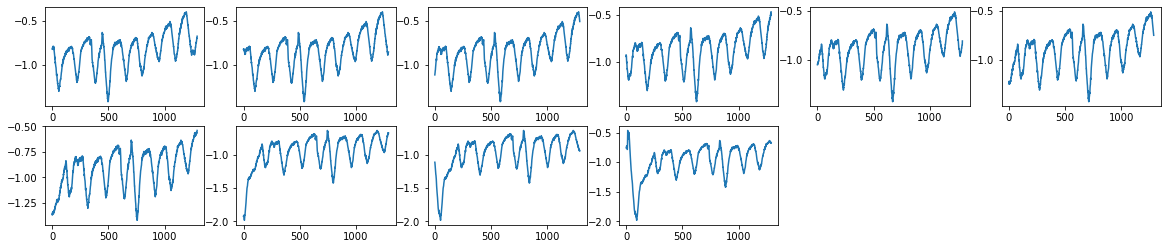

In [38]:
#plot n samples
n = 10

#plot some data
plt.figure()
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(n/5, 6, i+1)
    plt.plot(data[i])
